# Classification using a convolutional neural network

In [1]:
# Imports
import numpy as np
import torch
from torch import nn
import torch.nn.functional as F
import torchvision
import matplotlib.pyplot as plt
from torchvision.transforms import ToTensor, Lambda
from torchvision.datasets import FashionMNIST
from torch.utils.data import DataLoader

In [146]:
# Helper func
class PrintSize(nn.Module):
    def __init__(self):
        super(PrintSize, self).__init__()
    
    def forward(self, x):
        print(f"layer shape: {x.shape}")
        return x

# Import data

In [147]:
# Datasets
train_data = FashionMNIST('./Data', download=True, train=True, 
                          transform=ToTensor())

test_data  = FashionMNIST('./Data', download=True, train=False, 
                          transform=ToTensor())

# Dataloaders
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data , batch_size=64, shuffle=True)

# Neural network class

In [345]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        n_input = 28*28
        n_output = 10
        self.block = nn.Sequential(
                    nn.Conv2d(1,32,kernel_size=7),
                    nn.ReLU(),
                    nn.Dropout(),
                    nn.Conv2d(32,32,kernel_size=7),
                    nn.ReLU(),
                    nn.Dropout(),
                    nn.Conv2d(32,32,kernel_size=7),
                    nn.ReLU(),
                    nn.Dropout(),
                    nn.MaxPool2d(2),
            
#                     nn.Conv2d(12,12,kernel_size=3),
#                     nn.ReLU(),
#                     nn.Conv2d(12,12,kernel_size=3),
#                     nn.ReLU(),
#                     nn.MaxPool2d(2),
            
            
                    nn.Flatten(),
#                     PrintSize(),
                    nn.Linear(800,32),
                    nn.ReLU(),
                    nn.Dropout(),
                    nn.Linear(32,n_output),
                    nn.ReLU()
                            )
#         self.block = nn.Sequential(
#                     nn.Flatten(),
#                     nn.Linear(n_input,32),
#                     nn.ReLU(),
#                     nn.Linear(32,n_output),
#                     nn.ReLU()
#                     )
    def forward(self,x):
        x = self.block(x)
        return x

# Train, test functions

In [346]:
def train(train_loader, model, loss_fn, optimizer):
    size = len(train_loader)
    batch_size = train_loader.batch_size
    for i, (X,y) in enumerate(train_loader):
        logits = model(X)
        loss = loss_fn(logits,y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if i%int(size/5)==0:
            print(f"[{i*batch_size:05d}/{size*batch_size}] loss: {loss:.2e}")
            
def test(test_loader, model, loss_fn):
    size = len(train_loader)
    batch_size = train_loader.batch_size
    loss = 0
    accuracy = 0
    with torch.no_grad():
        for i, (X,y) in enumerate(test_loader):
            logits = model(X)
            loss += loss_fn(logits,y).item()
            accuracy += (logits.argmax(1)==y).sum().item()
        loss /= size
        accuracy /= size
        print(f"test loss: {loss:.2e}, accuracy: {accuracy:.3f}")

# Run

In [347]:
# Define model and hyperparameters
net = CNN()
_ = net(next(iter(train_loader))[0])

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters())
n_epoch = 6

In [348]:
# Run
for i_epoch in range(n_epoch):
    print(f"Epoch #{i_epoch:02d} =============")
    train(train_loader, net, loss_fn, optimizer)
    test(test_loader,net,loss_fn)

Epoch #00 =============
[00000/60032] loss: 2.31e+00
[11968/60032] loss: 1.41e+00
[23936/60032] loss: 1.14e+00
[35904/60032] loss: 9.49e-01
[47872/60032] loss: 1.48e+00
[59840/60032] loss: 8.08e-01
test loss: 1.40e-01, accuracy: 7.559
Epoch #01 =============
[00000/60032] loss: 7.76e-01
[11968/60032] loss: 8.92e-01
[23936/60032] loss: 7.39e-01
[35904/60032] loss: 6.82e-01
[47872/60032] loss: 7.34e-01
[59840/60032] loss: 4.28e-01
test loss: 1.09e-01, accuracy: 8.129
Epoch #02 =============
[00000/60032] loss: 8.06e-01
[11968/60032] loss: 5.44e-01
[23936/60032] loss: 6.64e-01
[35904/60032] loss: 4.86e-01
[47872/60032] loss: 7.33e-01
[59840/60032] loss: 6.21e-01
test loss: 9.87e-02, accuracy: 8.485
Epoch #03 =============
[00000/60032] loss: 5.51e-01
[11968/60032] loss: 6.02e-01
[23936/60032] loss: 6.30e-01
[35904/60032] loss: 5.76e-01
[47872/60032] loss: 6.18e-01
[59840/60032] loss: 5.58e-01
test loss: 8.85e-02, accuracy: 8.728
Epoch #04 =============
[00000/60032] loss: 5.19e-01
[11968/

# Visualize the learned parameters

0
0
0
0
0
0
0
0
0
0
0
0
2


RuntimeError: shape '[7, 7]' is invalid for input of size 588

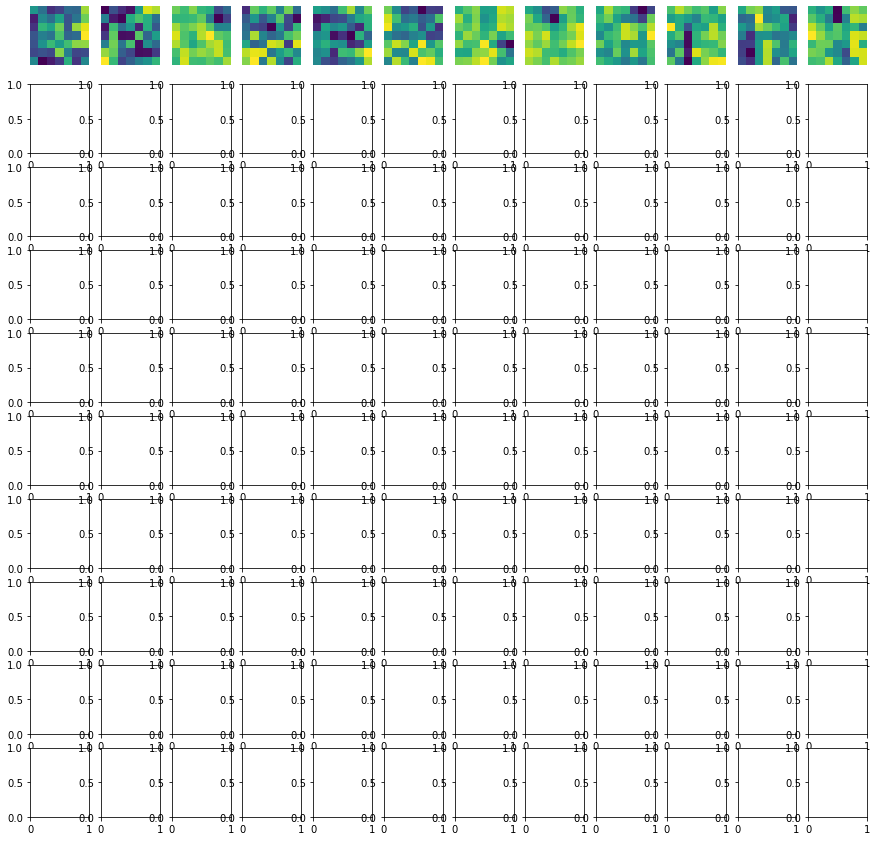

In [311]:
i_layer = 0
n_layers = 10
max_n_kernel = 12
fig, ax = plt.subplots(n_layers,max_n_kernel,figsize=[15,15])
with torch.no_grad():
    ii = 0
    for i_layer in [0,2,4,5,7,9,10]:
        for ik, kernel in enumerate(list(net.parameters())[i_layer]):
            print(i_layer)
            plt.sca(ax[ii,ik])
            plt.imshow(kernel.reshape((7,7)))
            plt.axis('off')
    

In [338]:
list(net.parameters())[4].shape

torch.Size([12, 12, 7, 7])